In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/serial-killers-dataset/Lessthan_5_victim_count.csv
/kaggle/input/serial-killers-dataset/5_to_14_victim_count.csv
/kaggle/input/serial-killers-dataset/15_to_30_victim_count.csv
/kaggle/input/serial-killers-dataset/Highest_victim_count.csv


# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/serial-killers-dataset/15_to_30_victim_count.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              78 non-null     object
 1   Country           78 non-null     object
 2   Years active      78 non-null     object
 3   Proven victims    78 non-null     int64 
 4   Possible victims  76 non-null     object
 5   Notes             78 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.8+ KB


In [5]:
df.head()

,Name,Country,Years active,Proven victims,Possible victims,Notes
0,Karl Denke,Germany,1900 to 1924,30,42+,Killed and cannibalized poor travelers and hom...
1,Francisco das Chagas Rodrigues de Brito,Brazil,1989 to 2003,30,42,"Pedophile who sexually abused, murdered and mu..."
2,Luis Gregorio Ramírez Maestre,Colombia,2010 to 2013,30,30,Killed motorists in various municipalities bef...
3,David Thabo Simelane,Swaziland,2000 to 2001,28,45,Sexually assaulted women he befriended in fore...
4,Zhang Jun,China,1993 to 2000,28,28,"Robbed 22 stores in several Chinese provinces,..."


# Preprocessing

In [6]:
df.isnull().sum()

Name                0
Country             0
Years active        0
Proven victims      0
Possible victims    2
Notes               0
dtype: int64

In [7]:
df.dropna(inplace = True)
df.isnull().sum()

Name                0
Country             0
Years active        0
Proven victims      0
Possible victims    0
Notes               0
dtype: int64

# Visualize

**Top 10 Countries with the Highest Number of Killers**

In [8]:
country_killer = df.groupby('Country',as_index=False)['Name'].count().sort_values(
    'Name',ascending = False).reset_index(col_level = 1).head(10)

country_killer.drop('index',axis=1,inplace=True)
country_killer.rename(columns={'Name':"Number of Killers"},inplace=True)
country_killer

,Country,Number of Killers
0,United States,15
1,South Africa,10
2,India,7
3,Russia,5
4,Iran,3
5,China,3
6,Brazil,2
7,Colombia,2
8,Soviet Union,2
9,Germany,2


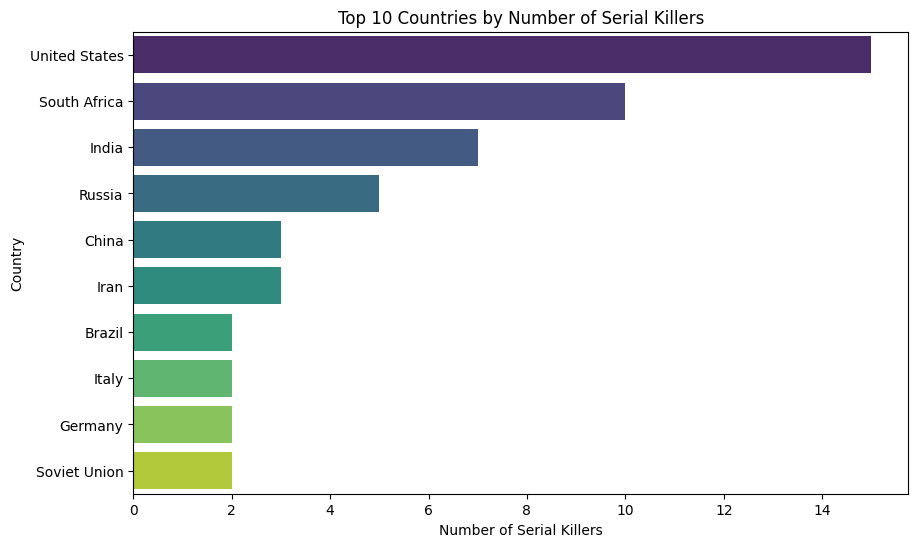

In [9]:
# Visualizing it

country_counts = df['Country'].value_counts()

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index[:10], x=country_counts.values[:10], palette="viridis")
plt.title("Top 10 Countries by Number of Serial Killers")
plt.xlabel("Number of Serial Killers")
plt.ylabel("Country")
plt.show()

****

**Start Year Distribution of Serial Killer Activity The plot provides insights into when most serial killers began their activity, helping identify trends over time.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


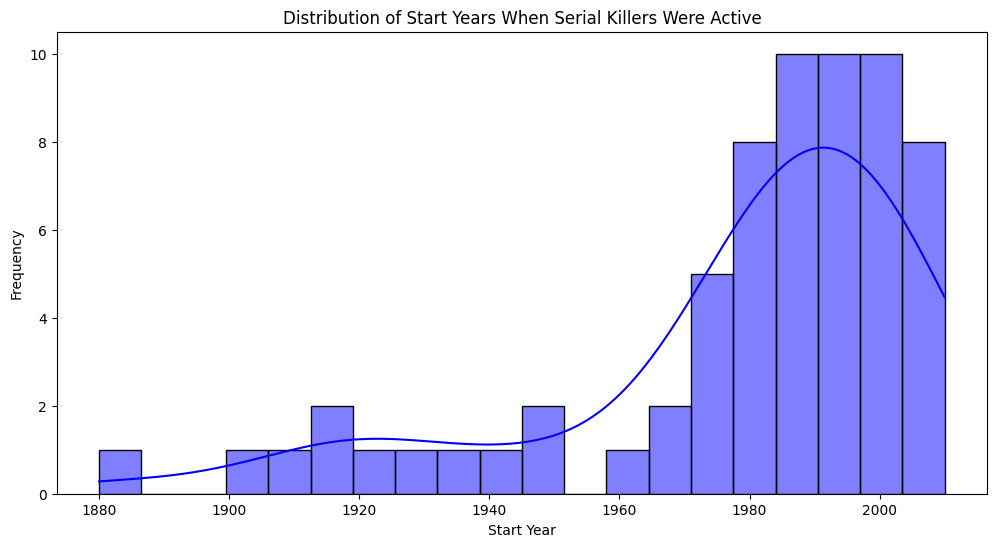

In [10]:
import re

def extract_years_range(years_active):
    years = re.findall(r'\d{4}', years_active)
    return (int(years[0]), int(years[1])) if len(years) == 2 else (np.nan, np.nan)

df[['Start Year', 'End Year']] = df['Years active'].apply(lambda x: pd.Series(extract_years_range(x)))
start_years = df['Start Year'].dropna()

# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(start_years, bins=20, kde=True, color="blue")
plt.title("Distribution of Start Years When Serial Killers Were Active")
plt.xlabel("Start Year")
plt.ylabel("Frequency")
plt.show()

****

**Most Common Words in Serial Killer Notes**

In [17]:
# Most Common Words in Serial Killer Notes

from collections import Counter

# Combine all notes into a single string
text = ' '.join(df['Notes'].dropna())

# Clean and tokenize the text (removing common stop words)
words = re.findall(r'\b\w+\b', text.lower())
stop_words = set(["the", "and", "of", "in", "to", "a", "for", "on", "with", "he", "was", "his", "that","as","by"])  # You can expand this list
filtered_words = [word for word in words if word not in stop_words]

# Count the words
word_counts = Counter(filtered_words)

# Convert most common words to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Frequency"])

# Display as a matrix
print(common_words_df)

            Word  Frequency
0      sentenced         40
1         killed         36
2          known         33
3        murders         26
4        victims         23
5           life         22
6         killer         19
7       murdered         18
8          years         18
9            who         17
10        people         17
11  imprisonment         16
12          from         16
13        prison         15
14         women         15
15      executed         15
16          were         12
17     convicted         12
18            19         12
19            at         11


****

**Timeline of Serial Killers Activity Periods**

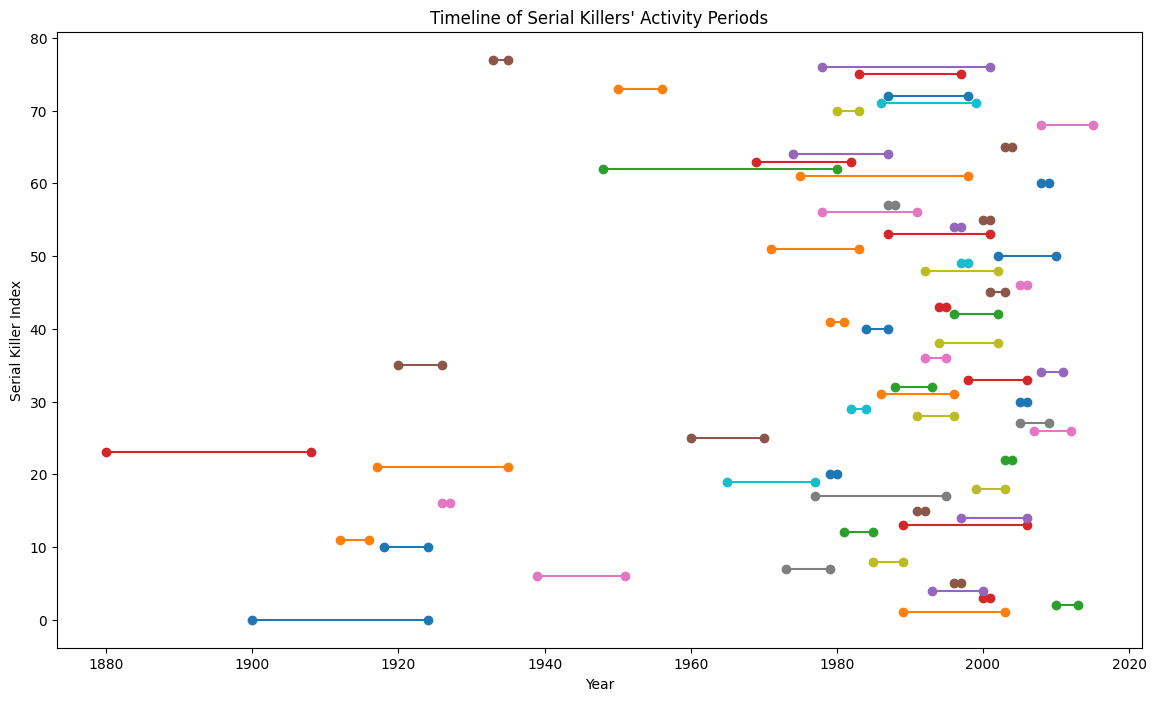

In [12]:

plt.figure(figsize=(14, 8))

for idx, row in df.iterrows():
    plt.plot([row['Start Year'], row['End Year']], [idx, idx], marker='o')

plt.title("Timeline of Serial Killers' Activity Periods")
plt.xlabel("Year")
plt.ylabel("Serial Killer Index")
plt.show()


/tmp/ipykernel_30/3964449248.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(start_years, shade=True, color="darkred")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


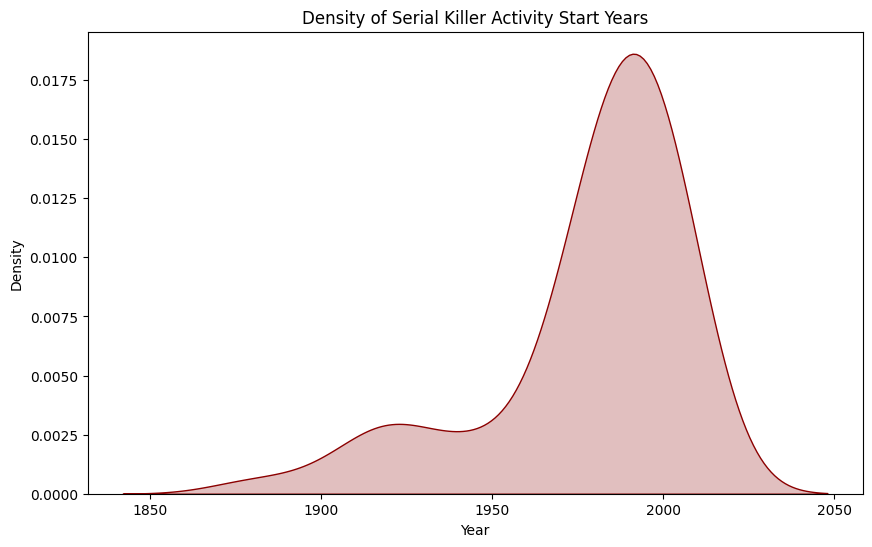

In [13]:
# Density of Serial Killer Activity Start Years
plt.figure(figsize=(10, 6))
sns.kdeplot(start_years, shade=True, color="darkred")
plt.title("Density of Serial Killer Activity Start Years")
plt.xlabel("Year")
plt.ylabel("Density")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


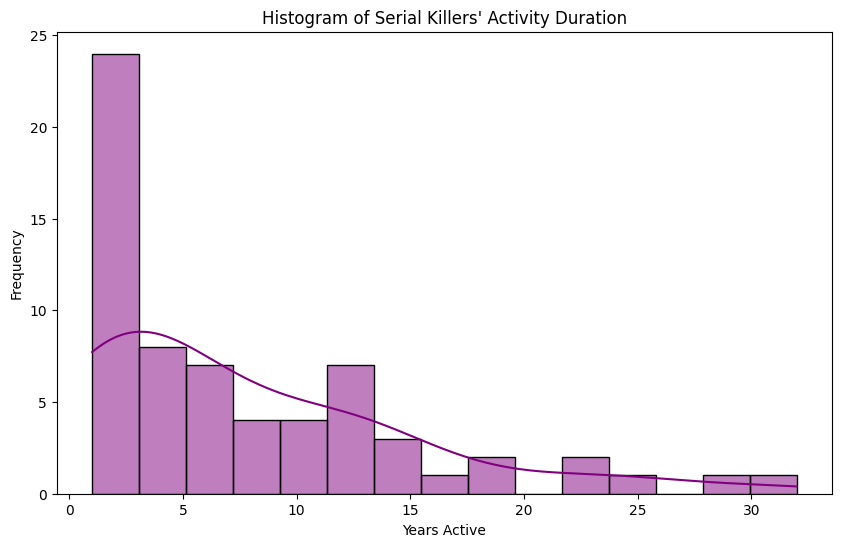

In [14]:
# Serial Killers' Activity Duration
df['Activity Duration'] = df['End Year'] - df['Start Year']

plt.figure(figsize=(10, 6))
sns.histplot(df['Activity Duration'].dropna(), bins=15, color="purple", kde=True)
plt.title("Histogram of Serial Killers' Activity Duration")
plt.xlabel("Years Active")
plt.ylabel("Frequency")
plt.show()


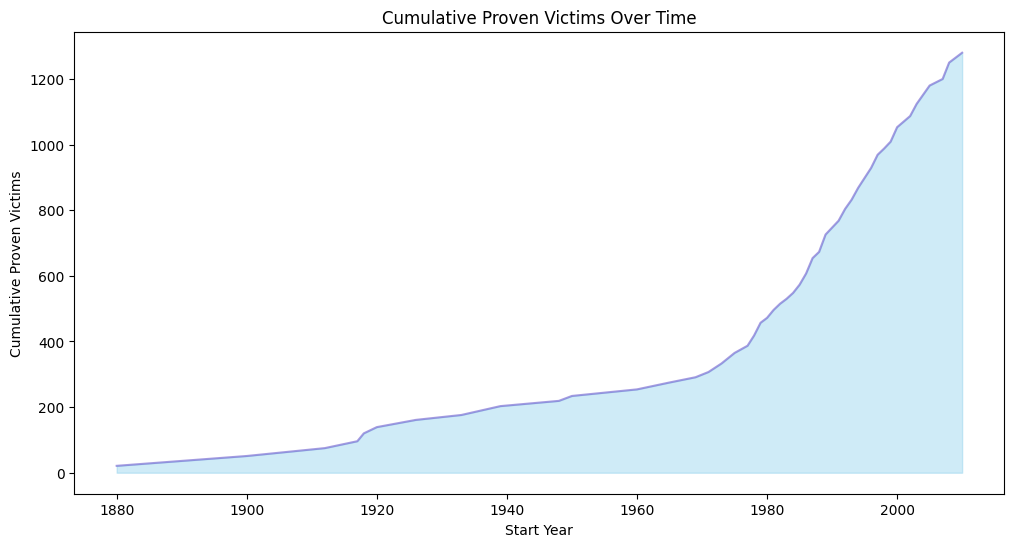

In [15]:
cumulative_victims = df.groupby('Start Year')['Proven victims'].sum().cumsum()

plt.figure(figsize=(12, 6))
plt.fill_between(cumulative_victims.index, cumulative_victims.values, color="skyblue", alpha=0.4)
plt.plot(cumulative_victims.index, cumulative_victims.values, color="Slateblue", alpha=0.6)
plt.title("Cumulative Proven Victims Over Time")
plt.xlabel("Start Year")
plt.ylabel("Cumulative Proven Victims")
plt.show()
